In [1]:
# Dealing with types of Data
# Images: Pillow, OpenCV etc
# Audio: Scipy and Librosa
# Text: Raw Python/Cython based loading, NLTK & SpaCy

In [2]:
# Main ML Libraries
import torch
import torchvision as tv
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.utils.data as data
import torch.nn as nn
import torch.nn.functional as fxnl
import torch.optim as optim

# Secondary Non-ML Libraries
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# Train an Image classifier
## Load and normalizing the CIFAR10 training and test datasets using torchvision
## Define a CNN
## Define a loss function
## Train the network on the training data
## Test the network on the test data


In [4]:
# Load & Normalize the CIFAR10

# Create a transform
data_transformer = transforms.Compose( [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Load and categorize dataset as training & test

train_data_set = datasets.CIFAR10(root= './dataset', train=True, download=True, transform=data_transformer)
test_data_set = datasets.CIFAR10(root= './dataset', train=False, download=True, transform=data_transformer)

train_loader = data.DataLoader(train_data_set, batch_size=4, shuffle=True, num_workers=2)
test_loader = data.DataLoader(test_data_set, batch_size=4, shuffle=True, num_workers=2)

image_classes = ("Plane", "Car", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck")

Files already downloaded and verified
Files already downloaded and verified


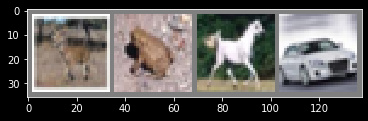

Deer   Frog  Horse    Car


In [5]:
# Display to verify dataset
def display_image(image):
    image = image / 2 + 0.5  #De-normalize
    numpy_image = image.numpy()
    plt.imshow(np.transpose(numpy_image, (1, 2, 0)))
    plt.show()

#Randomly select an image from the training image dataset
data_iter = iter(train_loader)
images, labels = data_iter.next()

# DispLay Image
display_image(tv.utils.make_grid(images))
print('  '.join('%5s' % image_classes[labels[j]] for j in range(4)))

In [6]:
# Define CNN
class ImageClassifier(nn.Module):

    # Constructor(s)
    def __init__(self):
        super(ImageClassifier, self).__init__()

        # Layers
        self.conv_layer_one = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        self.pool_layer = nn.MaxPool2d(2, 2)
        self.conv_layer_two = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.fc_one = nn.Linear(16 * 5 * 5, 120)
        self.fc_two = nn.Linear(120, 84)
        self.fc_three = nn.Linear(84, 10)
    
    def forward(self, linker):
        linker = self.pool_layer(fxnl.relu(self.conv_layer_one(linker)))
        linker = self.pool_layer(fxnl.relu(self.conv_layer_two(linker)))
        
        linker = linker.view(-1, 16 * 5 * 5)

        linker = fxnl.relu(self.fc_one(linker))
        linker = fxnl.relu(self.fc_two(linker))
        linker = self.fc_three(linker)

        return linker


In [7]:
image_classifier = ImageClassifier()

In [8]:
# Define a Loss function and optimizer 
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(image_classifier.parameters(), lr= 0.001, momentum= 0.9)

In [9]:
# Train Model without GPU

def train_model():
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(image_classifier.parameters(), lr= 0.001, momentum= 0.9)
    for epoch in range(2):
        running_loss = 0.0
        for idx, data in enumerate(train_loader, 0):
            inputs, target_labels = data
            optimizer.zero_grad() # clear parameter gradients
            
            labels = image_classifier(inputs)
            loss = criterion(labels, target_labels)
            loss.backward()
            optimizer.step()

            #### Print Stats
            running_loss += loss.item()
            if idx % 2000 == 1999: # print every 2k batches
                print()
                print('[%d, %5d] loss: %.3f' % (epoch + 1, idx + 1, running_loss / 2000))
                print()
                running_loss = 0.0
    print("Training Finished")


In [10]:
train_model()


[1,  2000] loss: 2.188


[1,  4000] loss: 1.812


[1,  6000] loss: 1.667


[1,  8000] loss: 1.562


[1, 10000] loss: 1.522


[1, 12000] loss: 1.476


[2,  2000] loss: 1.375


[2,  4000] loss: 1.391


[2,  6000] loss: 1.357


[2,  8000] loss: 1.351


[2, 10000] loss: 1.297


[2, 12000] loss: 1.264

Training Finished


In [11]:
path = './models/cifar_net.pth'
torch.save(image_classifier.state_dict(), path)

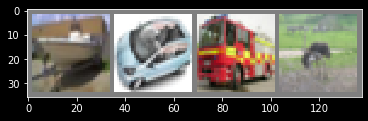

Ship    Car  Truck   Bird


In [12]:
# Test the network
#Randomly select an image from the training image dataset
data_iter = iter(test_loader)
images, labels = data_iter.next()

# DispLay Image
display_image(tv.utils.make_grid(images))
print('  '.join('%5s' % image_classes[labels[j]] for j in range(4)))

In [13]:
# Load Model
path = './models/cifar_net.pth'
image_classifier_model = ImageClassifier()
image_classifier_model.state_dict(torch.load(path))

# Get Outputs
label_outputs = image_classifier_model(images)

_, predicted = torch.max(label_outputs, 1)
print("Predictied", '  '.join('%5s' % image_classes[predicted[j]] for j in range(4)))

Predictied  Deer   Deer   Deer   Deer


In [14]:
def test_model():
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(image_classifier.parameters(), lr= 0.001, momentum= 0.9)
    correct_predicitions = 0
    total_predicitions = 0

    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = image_classifier_model(images)
            _, predictions = torch.max(outputs.data, 1)
            
            total_predicitions += labels.size(0)
            correct_predicitions += (predictions == labels).sum().item()
    
    print("Accuracy of the Image Classifier on the 10K Test images: %d %%" % (100 * correct_predicitions / total_predicitions))

In [15]:
test_model()

Accuracy of the Image Classifier on the 10K Test images: 10 %


In [16]:
def test_model_display_performance():
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(image_classifier.parameters(), lr= 0.001, momentum= 0.9)
    # Class Performance Comparison
    class_correct = list(0. for idx in range(10))
    class_total = list(0. for idx in range(10))

    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            outputs = image_classifier_model(images)
            _, predictions = torch.max(outputs, 1)
            c  = (predictions == labels).squeeze()
            for idx in range(4):
                label = labels[idx]
                class_correct[label] += c[idx].item()
                class_total[label] += 1

    for idx in range(10):
        print("Accuracy of %5s : %2d %%" % (image_classes[idx], 100 * class_correct[idx] / class_total[idx]))

In [17]:
test_model_display_performance()

Accuracy of Plane :  0 %
Accuracy of   Car :  0 %
Accuracy of  Bird :  0 %
Accuracy of   Cat :  0 %
Accuracy of  Deer : 100 %
Accuracy of   Dog :  0 %
Accuracy of  Frog :  0 %
Accuracy of Horse :  0 %
Accuracy of  Ship :  0 %
Accuracy of Truck :  0 %


In [18]:
# Get GPU Device
gpu_device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(gpu_device)

cuda:0


In [19]:
image_classifier.to(gpu_device)


ImageClassifier(
  (conv_layer_one): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool_layer): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_layer_two): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc_one): Linear(in_features=400, out_features=120, bias=True)
  (fc_two): Linear(in_features=120, out_features=84, bias=True)
  (fc_three): Linear(in_features=84, out_features=10, bias=True)
)

In [20]:
# Train with GPU (CUDA)
def train_model_gpu():
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(image_classifier.to(gpu_device).parameters(), lr= 0.001, momentum= 0.9)
    for epoch in range(2):
        running_loss = 0.0
        for idx, data in enumerate(train_loader, 0):
            inputs, target_labels = data[0].to(gpu_device), data[1].to(gpu_device)
            optimizer.zero_grad() # clear parameter gradients
            
            labels = image_classifier.to(gpu_device)(inputs)
            loss = criterion(labels, target_labels).to(gpu_device)
            loss.backward()
            optimizer.step()

            #### Print Stats
            running_loss += loss.item()
            if idx % 2000 == 1999: # print every 2k batches
                print()
                print('[%d, %5d] loss: %.3f' % (epoch + 1, idx + 1, running_loss / 2000))
                print()
                running_loss = 0.0
    print("Training Finished")

In [21]:
train_model_gpu()


[1,  2000] loss: 1.217


[1,  4000] loss: 1.212


[1,  6000] loss: 1.207


[1,  8000] loss: 1.219


[1, 10000] loss: 1.188


[1, 12000] loss: 1.187


[2,  2000] loss: 1.127


[2,  4000] loss: 1.119


[2,  6000] loss: 1.117


[2,  8000] loss: 1.112


[2, 10000] loss: 1.121


[2, 12000] loss: 1.102

Training Finished


In [22]:
def test_model_display_performance_gpu():
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(image_classifier.to(gpu_device).parameters(), lr= 0.001, momentum= 0.9)

    # Class Performance Comparison
    class_correct = list(0. for idx in range(10))
    class_total = list(0. for idx in range(10))

    with torch.no_grad():
        for data in test_loader:
            images, labels = data[0].to(gpu_device), data[1].to(gpu_device)
            outputs = image_classifier.to(gpu_device)(images)
            _, predictions = torch.max(outputs, 1)
            c  = (predictions == labels).squeeze()
            for idx in range(4):
                label = labels[idx]
                class_correct[label] += c[idx].item()
                class_total[label] += 1

    for idx in range(10):
        print("Accuracy of %5s : %2d %%" % (image_classes[idx], 100 * class_correct[idx] / class_total[idx]))

In [23]:
test_model_display_performance_gpu()

Accuracy of Plane : 70 %
Accuracy of   Car : 81 %
Accuracy of  Bird : 40 %
Accuracy of   Cat : 31 %
Accuracy of  Deer : 58 %
Accuracy of   Dog : 53 %
Accuracy of  Frog : 73 %
Accuracy of Horse : 70 %
Accuracy of  Ship : 70 %
Accuracy of Truck : 55 %


In [24]:
path = './models/cifar_net_gpu.pth'
torch.save(image_classifier.state_dict(), path)